<a href="https://colab.research.google.com/github/Othocs/ML_Projects_othmane/blob/main/challenge_baseline.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Import des libraries

In [ ]:
!pip install torchinfo
import numpy as np
import torch
import torch.nn as nn
import gdown
import os
from torchinfo import summary

## Téléchargement du dataset

In [ ]:
#Téléchargement du dataset
url = 'https://drive.google.com/uc?id=1KIX6QASxnWGPJcQ_Q-W8O1UPSbPA4uat'
output = 'dataset.zip'
if not os.path.exists(output):
	gdown.download(url, output, quiet=False)

#Dézippage du dataset

def unzip(zip_file, dest_dir):
	import zipfile
	with zipfile.ZipFile(zip_file, 'r') as zip_ref:
		zip_ref.extractall(dest_dir)

unzip('dataset.zip', './')

Downloading...
From (original): https://drive.google.com/uc?id=1KIX6QASxnWGPJcQ_Q-W8O1UPSbPA4uat
From (redirected): https://drive.google.com/uc?id=1KIX6QASxnWGPJcQ_Q-W8O1UPSbPA4uat&confirm=t&uuid=cc048368-686a-4be2-b494-d8578c69e44e
To: /content/dataset.zip
100%|██████████| 103M/103M [00:00<00:00, 229MB/s]


## Load le dataset

In [ ]:
X_train = np.load('X_train.npy')
X_clean_train = np.load('X_clean_train.npy')
X_test = np.load('X_test.npy')

print(X_train.shape)
print(X_clean_train.shape)
print(X_test.shape)

(1900, 128, 200)
(1900, 128, 200)
(476, 128, 200)


## Affichage des données

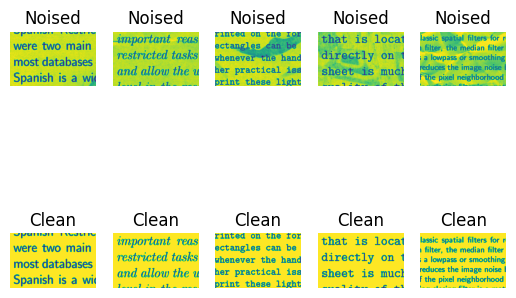

In [ ]:
import matplotlib.pyplot as plt

# first row show 5 noised images, second row show 5 clean images
for i in range(5):
	plt.subplot(2, 5, i + 1)
	plt.imshow(X_train[i])
	plt.title("Noised")
	plt.axis('off')

	plt.subplot(2, 5, i + 6)
	plt.imshow(X_clean_train[i])
	plt.title("Clean")
	plt.axis('off')

plt.show()

## Batch les données

In [ ]:
batch_size = 20
width = X_train.shape[1]
height = X_train.shape[2]
X_train_reshaped = X_train.reshape(-1, batch_size, width, height)
X_clean_train_reshaped = X_clean_train.reshape(-1, batch_size, width, height)

print(X_train_reshaped.shape)
print(X_clean_train_reshaped.shape)

(95, 20, 128, 200)
(95, 20, 128, 200)


## Ajouter la dimension de couleur
Pour l'instant, nos images sont de shape (width, height). Les couches de convolution veulent des images de shape (color, width, height). On va donc ajouter une dimension de couleur à nos images.

In [ ]:
X_train_expanded = np.expand_dims(X_train_reshaped, axis=2)
X_clean_train_expanded = np.expand_dims(X_clean_train_reshaped, axis=2)

print(X_train_expanded.shape)
print(X_clean_train_expanded.shape)

(95, 20, 1, 128, 200)
(95, 20, 1, 128, 200)


## Convertir les données en torch.tensor

In [ ]:
X_train_torch = torch.from_numpy(X_train_expanded).float()
X_clean_train_torch = torch.from_numpy(X_clean_train_expanded).float()

## Faire la même chose pour les données test

In [ ]:
batch_size_test = 14
X_test = X_test.reshape(-1, batch_size_test, width, height)
X_test_expanded = np.expand_dims(X_test, axis=2)
X_test_torch = torch.from_numpy(X_test_expanded).float()

## Créer le modèle

### Modèle 1

In [ ]:
class useless(nn.Module):
	def __init__(self):
		super().__init__()
		self.layer = nn.Conv2d(1, 1, kernel_size=3, padding=1)
		self.relu = nn.ReLU()

	def forward(self, x):
		y = self.layer(x)
		return self.relu(y)

class otho(nn.Module) :
	def __init__(self):
		super().__init__()
		self.convolution = nn.Conv2d(in_channels=1, out_channels=16, kernel_size=3, stride=1, padding=0)


		self.seq = nn.Sequential(
            nn.Conv2d(in_channels=1, out_channels=16, kernel_size=3, stride=1, padding=1),
						nn.BatchNorm2d(16),
            nn.ReLU(),
            nn.Conv2d(in_channels=16, out_channels=32, kernel_size=3, stride=1, padding=1),
						nn.BatchNorm2d(32),
            nn.ReLU(),
            nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3, stride=1, padding=1),
						nn.BatchNorm2d(64),
						nn.ReLu(),
            nn.Conv2d(in_channels=64, out_channels=128, kernel_size=3, stride=1, padding=1),
						nn.BatchNorm2d(128),
						nn.ReLu(),
            nn.Conv2d(in_channels=128, out_channels=1, kernel_size=3, stride=1, padding=1),

        )

	def forward(self, x):
		x = self.seq(x)
		return x


class otho2(nn.Module) :
	def __init__(self):
		super().__init__()
		self.convolution = nn.Conv2d(in_channels=1, out_channels=16, kernel_size=3, stride=1, padding=0)


		self.seq = nn.Sequential(
            nn.Conv2d(in_channels=1, out_channels=16, kernel_size=3, stride=2, padding=1),
						nn.BatchNorm2d(16),
            nn.ReLU(),
            nn.Conv2d(in_channels=16, out_channels=32, kernel_size=3, stride=2, padding=1),
						nn.BatchNorm2d(32),
            nn.ReLU(),
            nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3, stride=2, padding=1),
						nn.BatchNorm2d(64),
            nn.ReLU(),
          	nn.ConvTranspose2d(in_channels=64, out_channels=32, kernel_size=3, stride=2, padding=1),

        )

	def forward(self, x):
		x = self.seq(x)
		return x

In [ ]:
batch_size = 5
input_shape = (batch_size, 1, 128, 200)
model = otho()
summary(model, input_size=input_shape)

Layer (type:depth-idx)                   Output Shape              Param #
otho                                     [5, 1, 128, 200]          160
├─Sequential: 1-1                        [5, 1, 128, 200]          --
│    └─Conv2d: 2-1                       [5, 16, 128, 200]         160
│    └─BatchNorm2d: 2-2                  [5, 16, 128, 200]         32
│    └─ReLU: 2-3                         [5, 16, 128, 200]         --
│    └─Conv2d: 2-4                       [5, 32, 128, 200]         4,640
│    └─BatchNorm2d: 2-5                  [5, 32, 128, 200]         64
│    └─ReLU: 2-6                         [5, 32, 128, 200]         --
│    └─Conv2d: 2-7                       [5, 64, 128, 200]         18,496
│    └─BatchNorm2d: 2-8                  [5, 64, 128, 200]         128
│    └─Conv2d: 2-9                       [5, 128, 128, 200]        73,856
│    └─BatchNorm2d: 2-10                 [5, 128, 128, 200]        256
│    └─ReLU: 2-11                        [5, 128, 128, 200]        --


# Boucle d'entrainement

In [ ]:
optimizer = torch.optim.Adam(model.parameters(), lr=0.0001)
loss_function = nn.MSELoss()
epochs = 20

for epoch in range(epochs):
  print(f"Epoch: {epoch}")


  for i in range(len(X_train_torch)) :
      x = X_train_torch[i].cuda()
      y = X_clean_train_torch[i].cuda()

      optimizer.zero_grad()
      prediction = model(x)
      loss = loss_function(prediction, y)*100

      loss.backward()
      optimizer.step()

  print(loss.item())


Epoch: 0
15.057717323303223
Epoch: 1
1.5626089572906494
Epoch: 2
0.3061366379261017
Epoch: 3
0.21856990456581116
Epoch: 4
0.18295203149318695
Epoch: 5
0.16182221472263336
Epoch: 6
0.14562758803367615
Epoch: 7
0.1323850005865097
Epoch: 8
0.12157422304153442
Epoch: 9
0.11268751323223114
Epoch: 10
0.10573656857013702
Epoch: 11
0.0998443141579628
Epoch: 12
0.09475380927324295
Epoch: 13
0.09034179151058197
Epoch: 14
0.08643606305122375
Epoch: 15
0.08295229822397232
Epoch: 16
0.07980665564537048
Epoch: 17
0.0769021287560463
Epoch: 18
0.07437809556722641
Epoch: 19
0.07225126028060913


# Prédiction

In [ ]:
batch_size_test = 14
X_test = X_test.reshape(-1, batch_size_test, width, height)
X_test_expanded = np.expand_dims(X_test, axis=2)
X_test_torch = torch.from_numpy(X_test_expanded).float()

predictions = []
for i in range(len(X_test_torch)):
    X = X_test_torch[i].cuda()
    X_pred = model(X)
    predictions.append(X_pred.detach().cpu().numpy())

predictions = np.array(predictions)
predictions = predictions.reshape(-1, width, height)

np.save('predictions.npy', predictions)

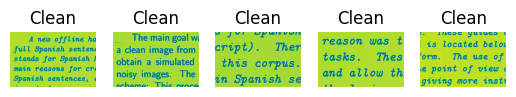

In [ ]:
for i in range(5):
	plt.subplot(2, 5, i + 6)
	plt.imshow(predictions[i])
	plt.title("Clean")
	plt.axis('off')